In [5]:
import numpy as np 
import pandas as pd
# scipy 
# scikit-learn 
# network x
# stats models 
# cvxpy

# pytorch 
# pytorch lightning 

import matplotlib.pyplot as plt 
import seaborn as sns
# plotly 
# cmocean 

### Data Exploration 

- It is important to understand if the response has a symmetric distribution, if the distribution has a decreasing frequency of larger observations (i.e., the distribution is skewed), if the distribution appears to be made up of two or more individual distributions (i.e., the distribution has multiple peaks or modes), or if there appears to be unusually low or high observations (i.e outliers).

- Understanding the distribution of the response as well as its variation provides a lower bound of the expectations of model performance. That is, if a model contains meaningful predictors, then the residuals from a model that contains these predictors should have less variation than the variation of the response. Furthermore, the distribution of the response may indicate that the response should be transformed prior to analysis.

- A third reason why we should work to understand the response is because the distribution may provide clues for including or creating features that help explain the response

### Boxplots 

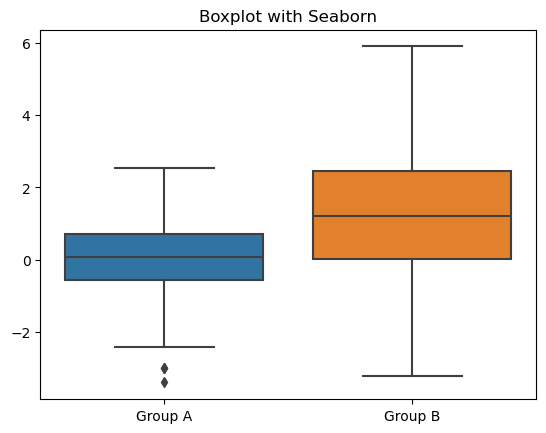

In [6]:
df = pd.DataFrame({
    'Group A': np.random.normal(0, 1, 100),
    'Group B': np.random.normal(1, 2, 100)
})

sns.boxplot(data=df)
plt.title("Boxplot with Seaborn")
plt.show()

### Distribution, Boxplot, Violin Plot 

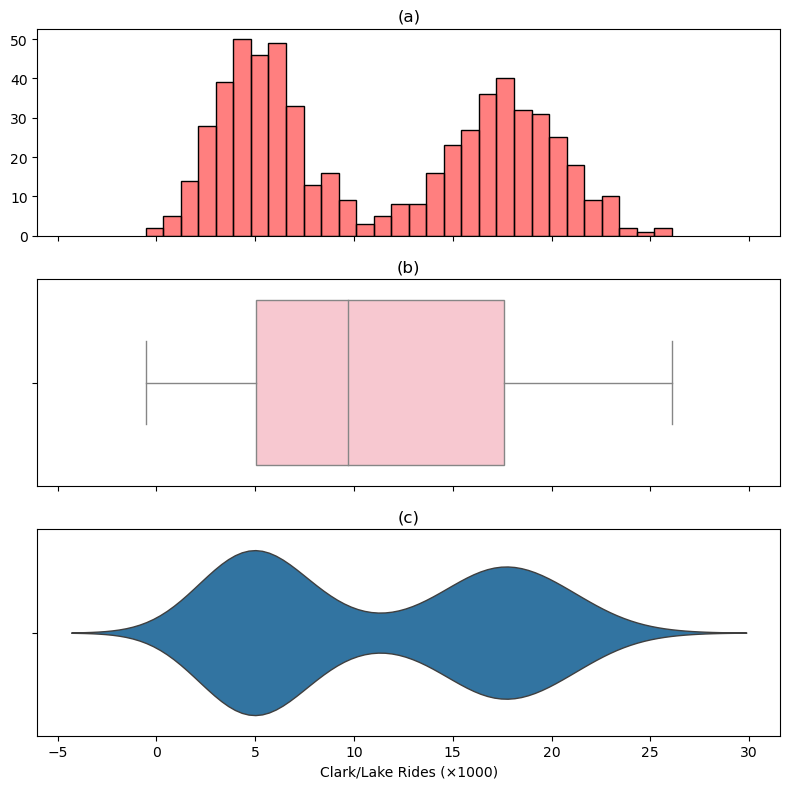

In [10]:
# Simulated data (you can replace this with your actual data)
np.random.seed(0)
data = np.concatenate([np.random.normal(5, 2, 300), np.random.normal(18, 3, 300)])
df = pd.DataFrame({'Clark_Lake_Rides': data})

# Create figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

# (a) Histogram
sns.histplot(df['Clark_Lake_Rides'], bins=30, kde=False, color='red', alpha=0.5, ax=axes[0])
axes[0].set_title('(a)')

# (b) Boxplot
sns.boxplot(x=df['Clark_Lake_Rides'], ax=axes[1], color='pink', fliersize=3, linewidth=1)
axes[1].set_title('(b)')

# (c) Violin plot
sns.violinplot(x=df['Clark_Lake_Rides'], ax=axes[2], inner=None, linewidth=1)
axes[2].set_title('(c)')

# Shared x-label
axes[2].set_xlabel('Clark/Lake Rides (×1000)')

# Clean up subplots
for ax in axes:
    ax.set_ylabel('')
    ax.label_outer()

plt.tight_layout()
plt.show()


### Side By side Feature Boxplots 

Examining the distribution of each predictor can help to guide our decisions about the need to engineer the features through transformation prior to analysis. When we have a moderate number of predictors (< ~100) and when the predictors are on the same order of magnitude, we can visualize the distributions simultaneously using side-by-side box or violin plots

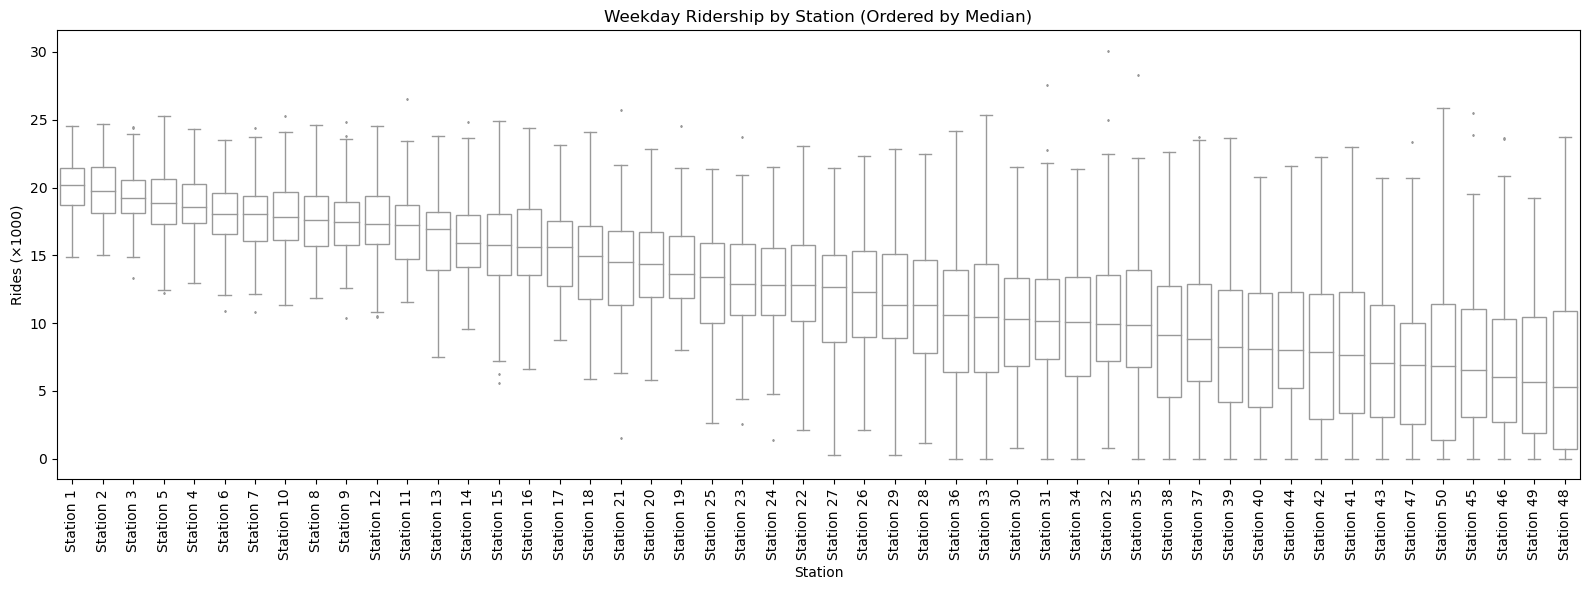

In [11]:
# Simulate example data: 50 stations with different distributions
np.random.seed(0)
stations = [f'Station {i+1}' for i in range(50)]
data = {
    'Station': np.repeat(stations, 100),
    'Rides': np.concatenate([
        np.random.normal(loc=20 - i * 0.3, scale=2 + i * 0.1, size=100)
        for i in range(50)
    ])
}
df = pd.DataFrame(data)
df['Rides'] = df['Rides'].clip(lower=0)  # No negative rides

# Order stations by median ridership
median_order = df.groupby('Station')['Rides'].median().sort_values(ascending=False).index

# Plot
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Station', y='Rides', order=median_order, color='white', fliersize=1, linewidth=1)
plt.xticks(rotation=90)
plt.xlabel("Station")
plt.ylabel("Rides (×1000)")
plt.title("Weekday Ridership by Station (Ordered by Median)")
plt.tight_layout()
plt.show()


### Breaking Feature up

Additional dimensions can be added to almost any figure by using faceting, colors, and shapes. Faceting refers to creating the same type of plot (e.g., a scatter plot) and splitting the plot into different panels based on some variable39. Figure 3.2 is a good example. While this is a simple approach, these types of augmentation can be powerful tools for seeing important patterns that can be used to direct the engineering of new features. The Clark/Lake station ridership distribution is a prime candidate for adding another dimension. As shown above, Figure 4.3 has two distinct peaks. A reasonable explanation for this would be that ridership is different for weekdays than for weekends

C:\Users\darra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\darra\AppData\Local\Temp\ipykernel_3548\3226177110.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


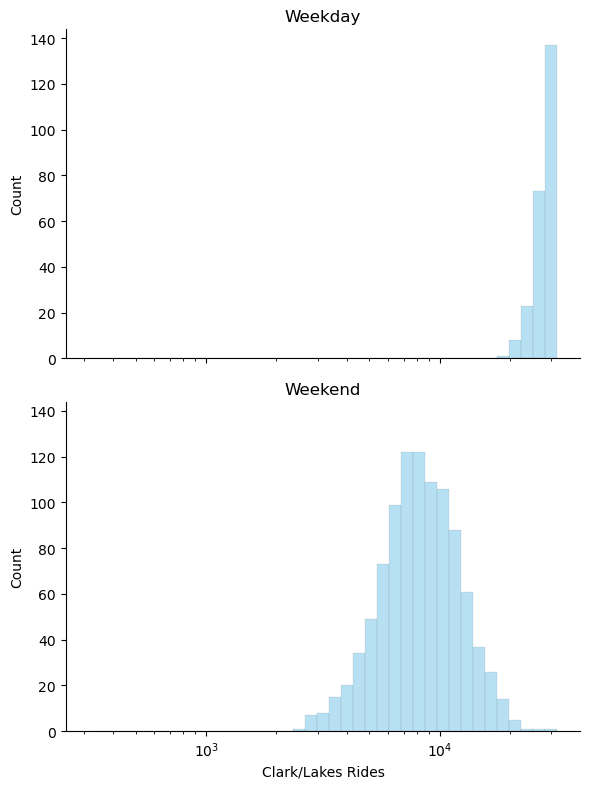

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated log-normal data
np.random.seed(1)
weekend_rides = np.random.lognormal(mean=9, sigma=0.4, size=1000)
weekday_rides = np.random.lognormal(mean=10.5, sigma=0.2, size=1000)

df = pd.DataFrame({
    'Rides': np.concatenate([weekday_rides, weekend_rides]),
    'DayType': ['Weekday'] * len(weekday_rides) + ['Weekend'] * len(weekend_rides)
})

# Define log-spaced bin edges
log_bins = np.logspace(2.5, 4.5, 40)  # Covers ~300 to ~30,000 with log spacing

# Faceted histogram with consistent bins
g = sns.FacetGrid(df, row='DayType', height=4, aspect=1.5, sharex=True)
g.map_dataframe(sns.histplot, x='Rides', bins=log_bins, color='skyblue', edgecolor='black', alpha=0.6)

# Adjust x-axis scale and labels
for ax, title in zip(g.axes.flat, ['Weekday', 'Weekend']):
    ax.set_xscale('log')
    ax.set_xlabel("Clark/Lakes Rides")
    ax.set_ylabel("Count")
    ax.set_title(title)

plt.tight_layout()
plt.show()


### Scatter plots accounting for type 

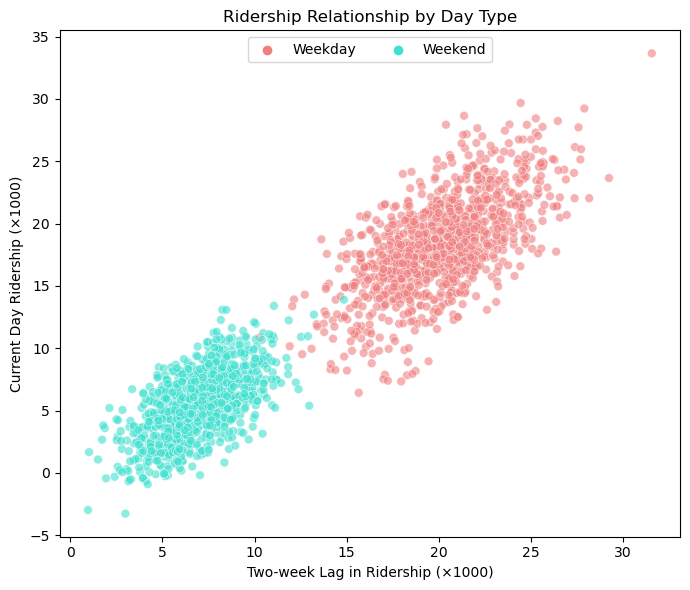

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(42)
n = 1000

# Create lagged ridership and current day ridership for weekday and weekend
lag_weekday = np.random.normal(20, 3, n)
current_weekday = lag_weekday * 0.9 + np.random.normal(0, 3, n)

lag_weekend = np.random.normal(7, 2, n)
current_weekend = lag_weekend * 0.8 + np.random.normal(0, 2, n)

# Combine into DataFrame
df = pd.DataFrame({
    'Lagged': np.concatenate([lag_weekday, lag_weekend]),
    'Current': np.concatenate([current_weekday, current_weekend]),
    'DayType': ['Weekday'] * n + ['Weekend'] * n
})

# Plot
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x='Lagged', y='Current', hue='DayType', alpha=0.6, s=40, palette=['lightcoral', 'turquoise'])

plt.xlabel("Two-week Lag in Ridership (×1000)")
plt.ylabel("Current Day Ridership (×1000)")
plt.title("Ridership Relationship by Day Type")
plt.legend(title='', loc='upper center', ncol=2)
plt.tight_layout()
plt.show()

### Heat Map by date 

This is random data so wont see patterns, but normally you should see patterns 

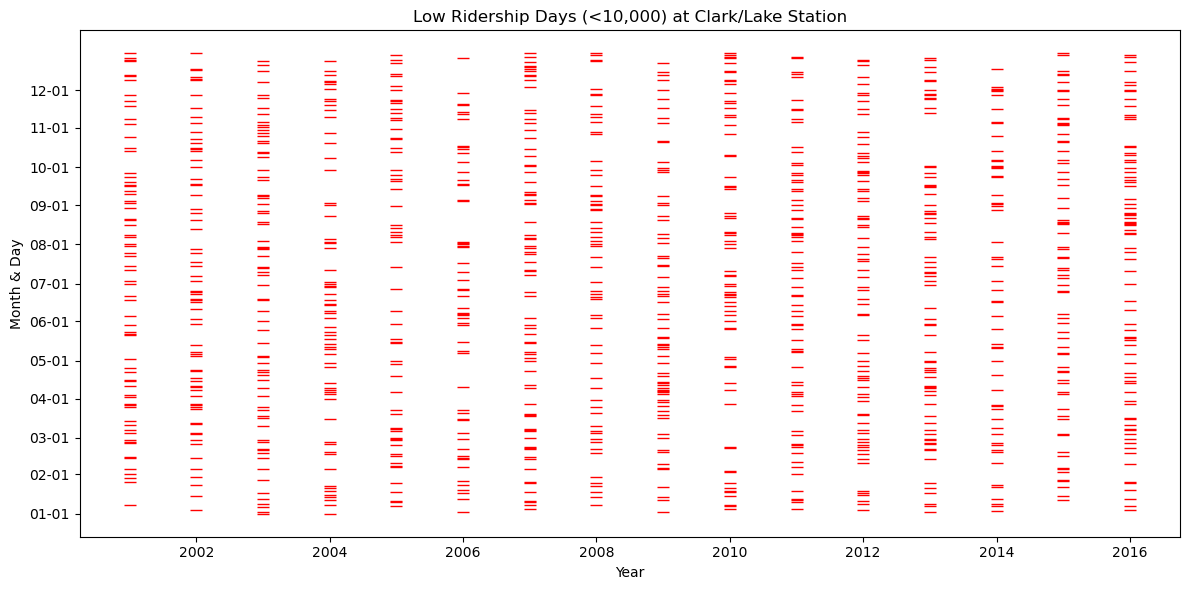

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)
dates = pd.date_range(start='2001-01-01', end='2016-12-31', freq='B')  # Business days
ridership = np.random.normal(loc=12000, scale=3000, size=len(dates))

df = pd.DataFrame({'Date': dates, 'Ridership': ridership})
df['LowRidership'] = df['Ridership'] < 10000
df['Year'] = df['Date'].dt.year
df['DayOfYear'] = df['Date'].dt.dayofyear  # Numeric y-axis

# Only low ridership
low_df = df[df['LowRidership']]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(low_df['Year'], low_df['DayOfYear'], linestyle='none', marker='_', color='red', markersize=8)

# Set labels and ticks
ax.set_xlabel("Year")
ax.set_ylabel("Month & Day")
ax.set_title("Low Ridership Days (<10,000) at Clark/Lake Station")

# Replace numeric y-ticks with month-day labels for interpretability
day_labels = pd.date_range("2000-01-01", "2000-12-31", freq="MS")  # 2000 is a leap year
ax.set_yticks(day_labels.dayofyear)
ax.set_yticklabels(day_labels.strftime("%m-%d"))

plt.tight_layout()
plt.show()

### Line Plot 

C:\Users\darra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\darra\AppData\Local\Temp\ipykernel_3548\1974354869.py:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


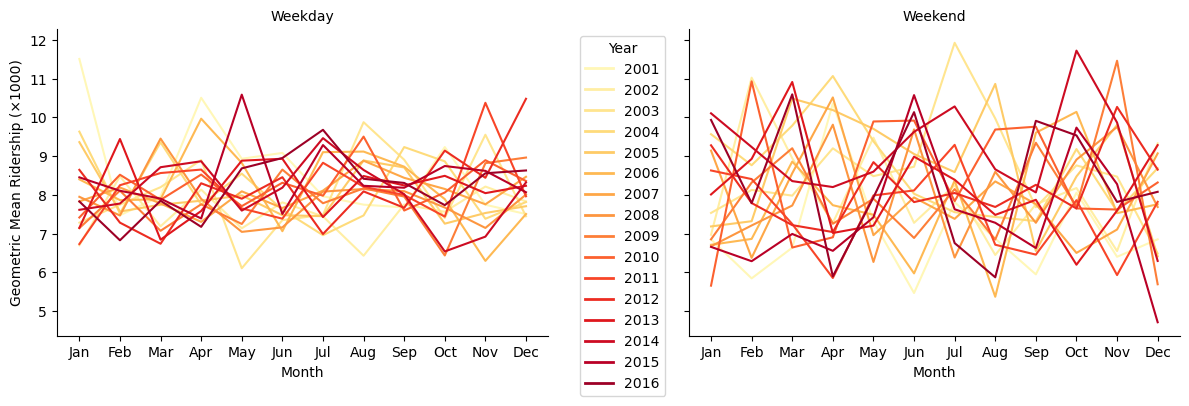

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import gmean  # geometric mean

# Simulate ridership data
np.random.seed(0)
dates = pd.date_range(start='2001-01-01', end='2016-12-31', freq='D')
df = pd.DataFrame({'Date': dates})
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayType'] = np.where(df['DayOfWeek'] < 5, 'Weekday', 'Weekend')
df['Ridership'] = np.random.lognormal(mean=9, sigma=0.5, size=len(df))

# Group by Year, Month, DayType
agg_df = df.groupby(['Year', 'Month', 'DayType'])['Ridership'].apply(gmean).reset_index()
agg_df['Month'] = agg_df['Month'].apply(lambda x: pd.to_datetime(f'2000-{x:02d}-01').strftime('%b'))

# Sort months chronologically
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
g = sns.FacetGrid(agg_df, col='DayType', height=4, aspect=1.5, sharey=True)
palette = sns.color_palette("YlOrRd", n_colors=16)

def plot_year_lines(data, color_map, **kwargs):
    years = sorted(data['Year'].unique())
    year_to_color = {y: c for y, c in zip(years, color_map)}
    for year, subset in data.groupby('Year'):
        subset_sorted = subset.set_index('Month').loc[month_order].reset_index()
        plt.plot(subset_sorted['Month'], subset_sorted['Ridership'] / 1000,
                 label=year, color=year_to_color[year])

g.map_dataframe(plot_year_lines, color_map=palette)

# Legend
handles = [plt.Line2D([0], [0], color=c, lw=2) for c in palette]
g.axes[0][0].legend(handles=handles, labels=[str(y) for y in range(2001, 2017)],
                    bbox_to_anchor=(1.05, 1), loc='upper left', title='Year')

g.set_axis_labels("Month", "Geometric Mean Ridership (×1000)")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

### PCA analysis 

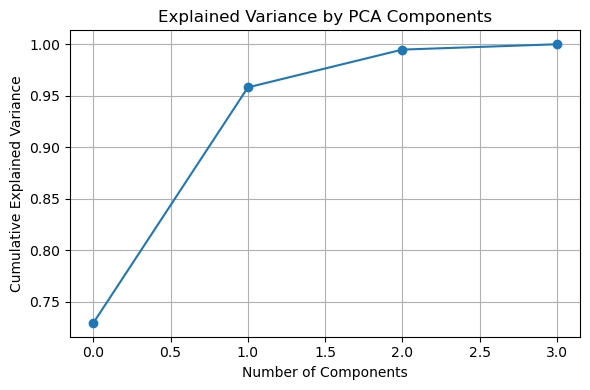

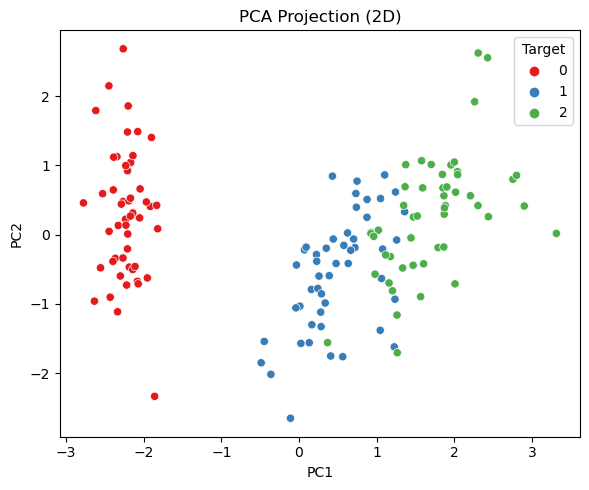

In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset: Iris (easily visualized in 2D)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# standardize data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA 
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)


# visualize pca 1
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# visualize pca 2 
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Target', palette='Set1')
plt.title("PCA Projection (2D)")
plt.tight_layout()
plt.show()

Goal:
To identify missing predictors or model structure by analyzing model residuals, especially those obtained via proper resampling (like cross-validation or rolling forecast origin).

General Steps:
1. Fit a Base Model
Use an initial set of features (e.g., time, demographics, lags, etc.)

Choose a model with interpretable residuals (e.g., linear regression)

2. Resample Carefully
Use time-aware resampling for temporal data (e.g., rolling window or expanding window)

Create assessment (test) sets that simulate real-world prediction timing

Get residuals only from assessment sets, not training

3. Diagnose Model Fit with Residuals
Visualize the distribution of assessment residuals

Look for patterns: bimodality, skewness, non-constant variance, etc.

Check residuals over time to identify periods with systematic underperformance

4. Use Partial Regression Plots to Discover New Predictors
For a potential new predictor 𝑋new

Fit model A: 
𝑦 ~ 𝑋new
get residuals 


Fit model B: 
𝑋new∼𝑋base
get residuals 
 
Plot residuals vs residuals 
Interpretation:

A linear or curved trend in the scatter indicates contains information not captured by existing predictors

Use this to justify adding new variables or interaction terms

5. Iterate with Residual Insights
Repeat steps 3–4 with:

Lagged variables

Categorical flags (e.g., day of week, holiday, event days)

Interaction terms

Nonlinear transformations (e.g., splines, logs)



# Numerical Transformations 

- For example, models that construct relationships between the predictors and the response that are based on the rank of the predictors’ values rather than the actual value, like trees, are immune to predictor distributions that are skewed or to individual samples that have unusual values (i.e., outliers). Other models such as K-nearest neighbors and support vector machines are much more sensitive to predictors with skewed distributions or outliers.
- Continuous predictors that are highly correlated with each other is another regularly occurring scenario that presents a problem for some models but not for others. Partial least squares, for instance, is specifically built to directly handle highly correlated predictors. But models like multiple linear regression or neural networks are adversely affected in this situation.

Commonly occuring issues 
- be on vastly different scales.
- follow a skewed distribution where a small proportion of samples are orders of magnitude larger than the majority of the data (i.e., skewness).
- contain a small number of extreme values.
- be censored on the low and/or high end of the range.
- have a complex relationship with the response and is truly predictive but cannot be adequately represented with a simple function or extracted by sophisticated models.
- contain relevant and overly redundant information. That is, the information collected could be more effectively and ef ficiently represented with a smaller, consolidated number of new predictors while still preserving or enhancing the new predictors’ relationship with the response.

### The first category of engineering techniques are those that address problematic characteristics of individual predictors 

Again, it is emphasized that the statistics required for the transformation (e.g., the mean) are estimated from the training set and are applied to all data sets (e.g., the test set or new samples). No look ahead bias 

1. Power Transformations
Box–Cox transformation

In [24]:
import numpy as np
import pandas as pd
from scipy import stats

# assume df is your DataFrame and 'x' > 0
x = df['x']
x_boxcox, fitted_lambda = stats.boxcox(x)
df['x_boxcox'] = x_boxcox
print(f"Estimated λ = {fitted_lambda:.3f}")

KeyError: 'x'

Yeo–Johnson transformation
An adaptation of Box–Cox that handles zeros and negatives. Uses the same “power‐transform” idea but works on all real x.

In [ ]:
from sklearn.preprocessing import PowerTransformer

# fit on training data
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['x_yeojohnson'] = pt.fit_transform(df[['x']])
print(f"Estimated λ = {pt.lambdas_[0]:.3f}")

Many different transformations and scalings together 

In [25]:
import numpy as np

# logit 
eps = 1e-6
p = df['p'].clip(eps, 1 - eps)
df['p_logit'] = np.log(p / (1 - p))

# to invert back:
df['p_invlogit'] = 1 / (1 + np.exp(-df['p_logit']))


# centering 
mean_x = df['x'].mean()
df['x_centered'] = df['x'] - mean_x

# z-score standardization  
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['x_zscore'] = scaler.fit_transform(df[['x']])

# min-max scaling 
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range=(0, 1))
df['x_minmax'] = mms.fit_transform(df[['x']])

# rolling average 
# 5‐point centered running mean
df['x_runmean'] = df['x'].rolling(window=5, center=True).mean()

KeyError: 'p'